In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

# Function to generate synthetic sinusoidal data
def generate_data(num_samples):
    x = np.linspace(0, 2*np.pi, num_samples)
    y = np.sin(x) + np.random.normal(0, 0.1, size=x.shape)
    return x.reshape(-1, 1), y.reshape(-1, 1)
    
# Define generator network
def build_generator():
    model = models.Sequential([
        layers.Dense(256, input_shape=(100,), activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(1024, activation='relu'),
        layers.Dense(1, activation='tanh')
    ])
    return model

# Define discriminator network
def build_discriminator():
    model = models.Sequential([
        layers.Dense(512, input_shape=(1,), activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Define GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = models.Sequential([
        generator,
        discriminator
    ])
    return model

# Plot synthetic data points
def plot_data(X, y, title):
    plt.scatter(X, y)
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

# Plot generated data points
def plot_generated_data(generator, title):
    n_samples = 1000
    X_generated = np.linspace(-1, 1, n_samples).reshape(-1, 1)
    y_generated = generator.predict(X_generated)
    plt.plot(X_generated, y_generated, color='red')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()



In [4]:
# Generate real sinusoidal data
num_samples = 1000
x_real = np.linspace(0, 2*np.pi, num_samples)
y_real = np.sin(x_real)

# Reshape real data for compatibility with neural network
x_real = x_real.reshape(-1, 1)
y_real = y_real.reshape(-1, 1)

# Normalize real data to [-1, 1] range
y_real_normalized = (y_real - np.min(y_real)) / (np.max(y_real) - np.min(y_real)) * 2 - 1


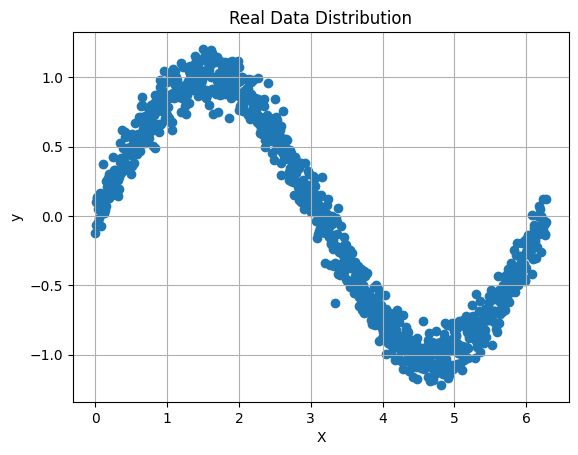

In [5]:
# Generate synthetic data
X_real, y_real = generate_data(1000)
    
# Plot real data
plot_data(X_real, y_real, 'Real Data Distribution')

In [ ]:
# Generate real sinusoidal data
num_samples = 1000
x_real, y_real = generate_data(num_samples)

# Normalize real data to [-1, 1] range
y_real_normalized = (y_real - np.min(y_real)) / (np.max(y_real) - np.min(y_real)) * 2 - 1

# Define GAN components
generator = build_generator()
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)

# Compile GAN
custom_optimizer = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# Compile discriminator and GAN with custom optimizer
discriminator.compile(optimizer=custom_optimizer, loss='binary_crossentropy')
gan.compile(optimizer=custom_optimizer, loss='binary_crossentropy')

# Training loop
epochs = 1000
batch_size = 128

d_loss_all = []
g_loss_all = []

for epoch in range(epochs):
    print(f"Epoch: {epoch+1}/{epochs}")
    for _ in range(num_samples // batch_size):
        # Sample random noise for generator input
        noise = np.random.randn(batch_size, 100)
        
        # Generate fake sinusoidal data
        y_fake = generator.predict(noise)
        
        # Sample real sinusoidal data batch
        idx = np.random.randint(0, num_samples, size=batch_size)
        x_real_batch = x_real[idx]
        y_real_batch = y_real_normalized[idx]
        
        # Train discriminator
        real_labels = np.ones((batch_size, 1))
        fake_labels = np.zeros((batch_size, 1))
        d_loss_real = discriminator.train_on_batch(y_real_batch, real_labels)
        d_loss_fake = discriminator.train_on_batch(y_fake, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        
        # Train generator
        noise = np.random.randn(batch_size, 100)
        g_loss = gan.train_on_batch(noise, real_labels)

        d_loss_all.append(d_loss)
        g_loss_all.append(g_loss)
    
    # Print epoch loss
    print(f"  D Loss: {d_loss}, G Loss: {g_loss}")



Epoch: 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
  D Loss: 0.7074975967407227, G Loss: 0.646905243396759
Epoch: 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
  D Loss: 0.7098028659820557, G Loss: 0.6438690423965454
Epoch: 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
  D Loss: 0.7106863856315613, G Loss: 0.642857

In [ ]:
import pickle

# Variable to be saved
my_variable = generator

# File path to save the variable
file_path = 'generator_sin1.pkl'

# Open a file in binary mode
with open(file_path, 'wb') as file:
    # Use Pickle to dump the variable to the file
    pickle.dump(my_variable, file)

In [ ]:
# Plot for d_loss and g_loss
plt.figure()
plt.plot(d_loss_all)
plt.plot(g_loss_all)
plt.legend('d-loss','g-loss')
plt.grid(True)
plt.show()

# Generate synthetic sinusoidal data
noise = np.random.randn(num_samples, 100)
y_fake = generator.predict(noise)

# Denormalize synthetic data
y_fake_denormalized = (y_fake + 1) / 2 * (np.max(y_real) - np.min(y_real)) + np.min(y_real)

# Plot real and generated data
plt.figure(figsize=(10, 5))
plt.plot(x_real, y_real, label='Real Sinusoidal Data', color='blue')
plt.plot(x_real, y_fake_denormalized, label='Generated Sinusoidal Data', color='red', linestyle='dashed')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Real vs Generated Sinusoidal Data')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
"""import matplotlib.pyplot as plt

d_loss = [0.717, 0.691, 0.712, 0.742, 0.768, 0.791, 0.810, 0.825, 0.839, 0.851, 0.862, 0.868, 0.876, 
          0.882, 0.887, 0.892, 0.896, 0.900, 0.904, 0.907, 0.910, 0.913, 0.915, 0.918, 0.920, 0.922,
          0.924, 0.925, 0.927, 0.923, 0.930, 0.931, 0.933, 0.934, 0.936, 0.937, 0.938, 0.940, 0.941,  
          0.942, 0.943, 0.944, 0.945, 0.946, 0.947, 0.948, 0.949, 0.950, 0.951, 0.952]
g_loss = [0.694, 0.648, 0.583, 0.539, 0.511, 0.490, 0.476, 0.464, 0.454, 0.449, 0.437, 0.432, 0.427, 
          0.423, 0.420, 0.416, 0.413, 0.410, 0.407, 0.405, 0.402, 0.399, 0.397, 0.396, 0.394, 0.392, 
          0.390, 0.389, 0.387, 0.387, 0.385, 0.384, 0.382, 0.382, 0.381, 0.380, 0.379, 0.378, 0.378, 
          0.378, 0.376, 0.376, 0.375, 0.374, 0.374, 0.373, 0.373, 0.372, 0.371, 0.371] 

plt.figure()
plt.plot(d_loss)
plt.plot(g_loss)
"""

In [ ]:
# Writing data to a binary file
data_to_write = generator

with open('generator.bin', 'wb') as f:
    f.write(data_to_write)


In [ ]:
# Reading data from the binary file
with open('generator.bin', 'rb') as f:
    data_read = f.read()
    print(data_read)

In [ ]:
# Generate new images
def generate_images(generator, n_samples):
    noise = np.random.normal(0, 1, size=[n_samples, 100])
    generated_images = generator.predict(noise)
    return generated_images

# Generate and plot new images
def plot_generated_images(generator, n_samples):
    generated_images = generate_images(generator, n_samples)
    fig, axs = plt.subplots(1, n_samples, figsize=(15, 15))
    for i in range(n_samples):
        axs[i].imshow(generated_images[i].reshape(28, 28), cmap='gray')
        axs[i].axis('off')
    plt.show()

# Generate and plot 10 new images
plot_generated_images(generator, 10)
